Install Tensorflow

In [32]:
pip install tensorflow-gpu==2.0

     |████████████████████████████████| 380.8 MB 32 kB/s s eta 0:00:01     |██████████████████▏             | 216.3 MB 42.3 MB/s eta 0:00:04
     |████████████████████████████████| 50 kB 5.0 MB/s  eta 0:00:01
     |████████████████████████████████| 3.8 MB 44.0 MB/s eta 0:00:01
     |████████████████████████████████| 449 kB 38.8 MB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7539 sha256=159083936ba3aba0d121099abccd0bc45464b4b7d2d07ee0b11f7d15dc54a4ec
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: t

Import essential libraries and packages needed in the project

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math
import numpy as np
import h5py
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
import tqdm
epsilon = 1e-3

%matplotlib inline
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation,MaxPooling2D,Dropout,BatchNormalization
# For one hot y
from numpy import argmax
from keras.utils import to_categorical
from tensorflow.keras import regularizers
from keras.optimizers import Adam


Check tensorflow version

In [2]:
tf.__version__

'2.2.0'

#### The Street View House Number  dataset

In this notebook ,we will use Street View House Number dataset (Format - 2) .It consists of a training set of 73257 images with corresponding labels, and a test set of 26032 images. 



Our goal is to construct a neural network that classifies images of digits into one of 10 classes.

Function to open mat files

In [3]:

# loadmat func to read mat files 
def load_mat_func(path):
    data=loadmat(path)
    return data['X'],data['y']
 

In [4]:
train_X_orig,train_Y_orig=load_mat_func('../input/svhntrainingdata/train_32x32.mat')

test_X_orig,test_Y_orig=load_mat_func('../input/svhntestingdata/test_32x32.mat')


# getting shape of training and testing set

print("Shape of training set:",train_X_orig.shape,train_Y_orig.shape)
print("Shape of testing set:",test_X_orig.shape,test_Y_orig.shape)


Shape of training set: (32, 32, 3, 73257) (73257, 1)
Shape of testing set: (32, 32, 3, 26032) (26032, 1)


In [5]:
train_X,train_Y=train_X_orig.transpose((3,0,1,2)),train_Y_orig[: ,0]
test_X,test_Y=test_X_orig.transpose((3,0,1,2)),test_Y_orig[: ,0]

# getting shape of training and testing set after transpose

print("Shape of training set after transpose:",train_X.shape,train_Y.shape)
print("Shape of testing set after transpose:",test_X.shape,test_Y.shape)


Shape of training set after transpose: (73257, 32, 32, 3) (73257,)
Shape of testing set after transpose: (26032, 32, 32, 3) (26032,)


In [6]:
train_Y_orig[: ,0]

array([1, 9, 2, ..., 1, 6, 9], dtype=uint8)

In [7]:
train_Y_orig

array([[1],
       [9],
       [2],
       ...,
       [1],
       [6],
       [9]], dtype=uint8)

In [8]:
train_Y

array([1, 9, 2, ..., 1, 6, 9], dtype=uint8)

y = 3


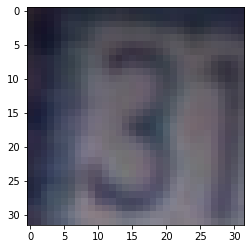

In [9]:
# Example of a picture
index = 8
plt.imshow(train_X[index])
print ("y = " + str(np.squeeze(train_Y_orig[index, :])))

Plot images for testing and training set

In [10]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])

        ax.set_title(labels[i])

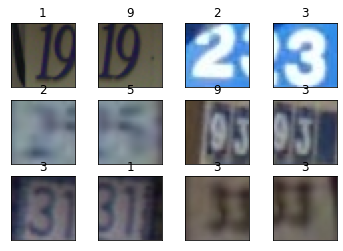

In [11]:
plot_images(train_X,train_Y, 3, 4)

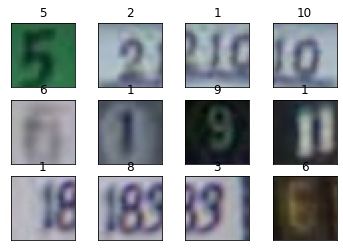

In [12]:
plot_images(test_X,test_Y, 3, 4)


In [ ]:
np.unique(train_X_orig)

In [ ]:
np.unique(train_X)

In [ ]:
print(np.unique(train_Y))

In [ ]:
print(np.unique(test_Y))

Converting class label '10' to '0' so we have labels from 0 to 9





In [13]:
train_Y[train_Y==10]=0
test_Y[test_Y==10]=0

Preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [14]:
# Normalize image vectors

X_train = train_X/255.
X_test = test_X/255.


Model
Conv2D -> MaxPooling2D -> Dropout -> Conv2D -> MaxPooling2D -> Dropout -> Conv2D -> Dropout -> Flatten -> Dense -> Dropout -> Dense -> Dropout ->Dense -> Dropout -> Dense

We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 5x5 kernel and 6 filters. Use regularizer L2 and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and 2 strides.
* A dropout layer with rate 0.2.
* A 2D convolutional layer with a 5x5 kernel and 6 filters. Use regularizer L2 and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and 2 strides.
* A dropout layer with rate 0.2.
* A 2D convolutional layer with a 5x5 kernel and 6 filters. Use regularizer L2 and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A dropout layer with rate 0.2.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* A dense hidden layers, with 84 units and ReLU activation functions.
* A dropout layer with rate 0.2.
* A dense hidden layers, with 84 units and ReLU activation functions.
* A dropout layer with rate 0.2.
* A dense hidden layers, with 84 units and ReLU activation functions.
* A dropout layer with rate 0.2.
* A dense output layer with 10 units and the softmax activation function.

In particular, your neural network should have 14 layers.



In [15]:
def define_model(input_shape,wt):
  model=Sequential([
                    

                    Conv2D(6,(5,5),kernel_regularizer=regularizers.l2(wt),input_shape=(input_shape),activation='relu',padding='SAME'),
                    MaxPooling2D((2,2),strides=2,padding='VALID'),
                    Dropout(0.2),
                    Conv2D(16,(5,5),activation='relu',kernel_regularizer=regularizers.l2(wt),padding='VALID'),
                    MaxPooling2D((2,2),strides=2,padding='VALID'),
                    Dropout(0.2),
                    
                    Conv2D(120,(5,5),input_shape=(X_train.shape),activation='relu',kernel_regularizer=regularizers.l2(wt),padding='VALID'),
                    Dropout(0.2),
                    Flatten(),
                    Dense(84,activation='relu',kernel_regularizer=regularizers.l2(wt)),
                    Dropout(0.2),
                    Dense(84,activation='relu',kernel_regularizer=regularizers.l2(wt)),
                    Dropout(0.2),
                    Dense(84,activation='relu',kernel_regularizer=regularizers.l2(wt)),
                    Dropout(0.2),
                    Dense(10,activation='softmax'),
                   
                   


                    
                 ])

  return model



In [16]:
# Run your function to get the model

model=define_model(X_train[1].shape,1e-5)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 120)         4

#### Compile the model

We should now compile the model using the `compile` method. To do so, we need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [18]:
def compile_model(model):

  compile=model.compile(
      optimizer=Adam(),
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )


  return compile

In [19]:
# Run your function to compile the model

compile_model(model)

#### Fit the model to the training data

Now we should train the model on the given dataset, using the model's `fit` method. Set the training to run for 20 epochs, and return the training history to be used for plotting the learning curves.

In [20]:
def train_model(model,X_train,train_Y):

    
  history=model.fit(X_train,train_Y,epochs=100,batch_size=32)

  return history

In [21]:
# Run your function to train the model

history=train_model(model,X_train,train_Y)

Epoch 1/100
2290/2290 [==============================] - 9s 4ms/step - loss: 1.1934 - accuracy: 0.6064
Epoch 2/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.6653 - accuracy: 0.8010
Epoch 3/100
2290/2290 [==============================] - 10s 4ms/step - loss: 0.5991 - accuracy: 0.8250
Epoch 4/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.5640 - accuracy: 0.8360
Epoch 5/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.5391 - accuracy: 0.8446
Epoch 6/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.5248 - accuracy: 0.8494
Epoch 7/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.5147 - accuracy: 0.8537
Epoch 8/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.4986 - accuracy: 0.8574
Epoch 9/100
2290/2290 [==============================] - 10s 4ms/step - loss: 0.4986 - accuracy: 0.8595
Epoch 10/100
2290/2290 [==============================] - 9s 4ms/step -

2290/2290 [==============================] - 9s 4ms/step - loss: 0.4236 - accuracy: 0.8909
Epoch 80/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.4225 - accuracy: 0.8922
Epoch 81/100
2290/2290 [==============================] - 11s 5ms/step - loss: 0.4236 - accuracy: 0.8914
Epoch 82/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.4252 - accuracy: 0.8909
Epoch 83/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.4219 - accuracy: 0.8916
Epoch 84/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.4247 - accuracy: 0.8911
Epoch 85/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.4224 - accuracy: 0.8916
Epoch 86/100
2290/2290 [==============================] - 9s 4ms/step - loss: 0.4247 - accuracy: 0.8914
Epoch 87/100
2290/2290 [==============================] - 10s 4ms/step - loss: 0.4225 - accuracy: 0.8919
Epoch 88/100
2290/2290 [==============================] - 10s 4ms/step - lo

#### Evaluate the model

Finally, we should evaluate the performance of our model on the test set, by calling the model's `evaluate` method.

In [22]:
def evaluate_model(model, X_train,train_Y):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """

    loss,metrics= model.evaluate(X_train,train_Y)

    return loss,metrics 

#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [23]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

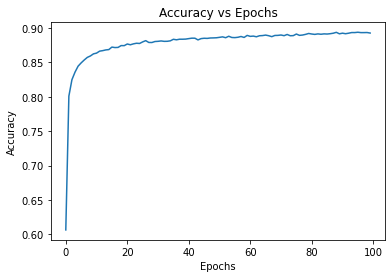

In [24]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

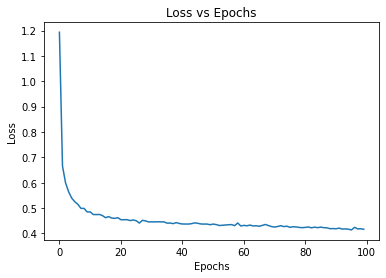

In [25]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

Training Accuracy

In [26]:
# Run your function to evaluate the model for training set

train_loss, train_accuracy = evaluate_model(model,X_train,train_Y)
print(f"Training loss: {train_loss}")
print(f"Training accuracy: {train_accuracy}")

2290/2290 [==============================] - 6s 3ms/step - loss: 0.2561 - accuracy: 0.9410
Training loss: 0.25606077909469604
Training accuracy: 0.9410431981086731


Testing Accuracy

In [27]:
# Run your function to evaluate the model for testing set

test_loss, test_accuracy = evaluate_model(model,X_test,test_Y)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

814/814 [==============================] - 2s 3ms/step - loss: 0.3495 - accuracy: 0.9178
Test loss: 0.3495453894138336
Test accuracy: 0.9177935123443604


#### Model predictions

Let's see some model predictions! We will randomly select images from the test data, and display the image and label for each. 

In [ ]:
# Run this cell to get model predictions on randomly selected test images

random_inx = np.random.choice(X_test.shape[0])
inx=random_inx
test_image = X_test[inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {test_Y[inx]}")